### Importing required libraries

In [29]:
ROOT_DIR = "/home/vikas/Lab/Decoding NNs"

In [30]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import cv2
import gdown
import sys
sys.path.append(ROOT_DIR)
from utils import cifar10_classes

### Downloading and Loading the trained model

In [31]:
model_dir = f"{ROOT_DIR}/models"
os.makedirs(model_dir, exist_ok=True)
model_url = "https://drive.google.com/file/d/1uYIdD3eGzQ4lsiyiokdFrNPb9BFUEONK/view?usp=sharing"
file_id = model_url.split("/")[-2]
download_url = f"https://drive.google.com/uc?export=download&id={file_id}"
download_as = f"{model_dir}/cifar10_acc90.zip"
if not os.path.exists(download_as):
    gdown.download(download_url, download_as)
    !unzip "{download_as}" -d "{model_dir}"
print(f"Model downloaded and extracted successfully!")

Model downloaded and extracted successfully!


In [32]:
model = tf.keras.models.load_model(f"{model_dir}/cifar10_acc90/cifar10_acc90.h5")

### Loading the dataset

In [33]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train = X_train / 255
X_test = X_test / 255
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

### Making predictions

In [34]:
y_test_preds = model.predict(X_test, verbose=0)

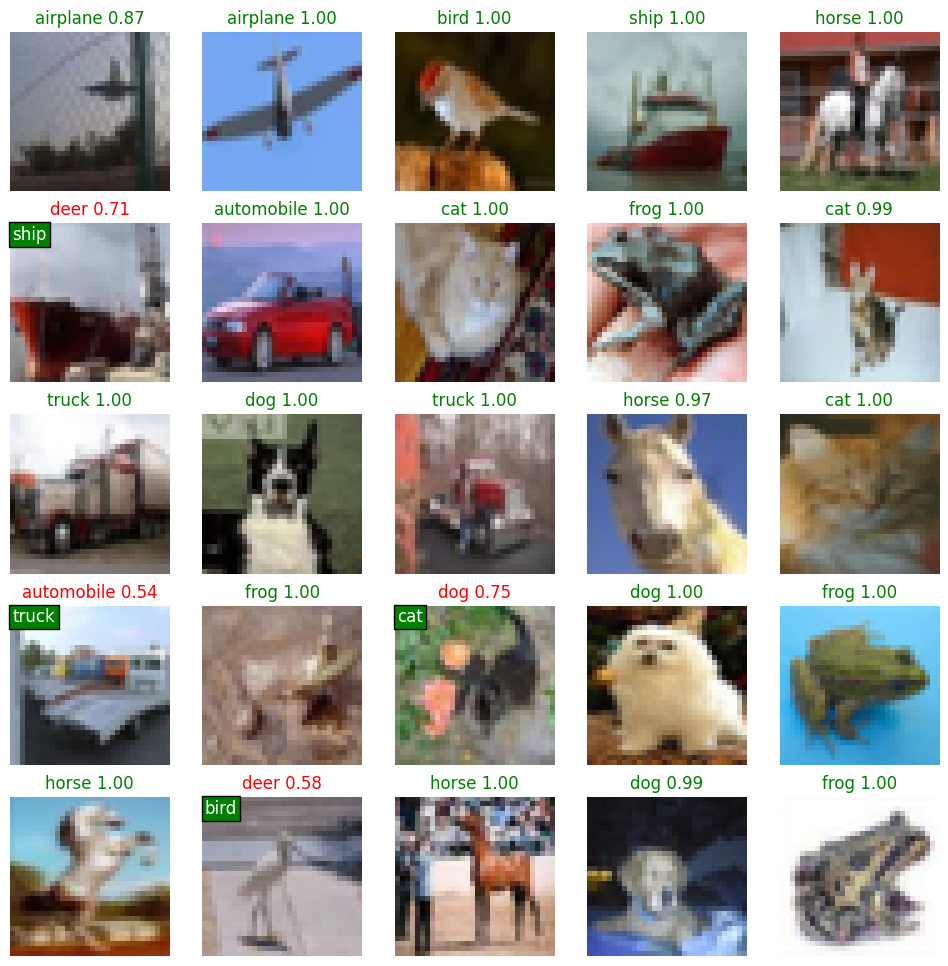

In [35]:
fig, axes = plt.subplots(5, 5, figsize=(12, 12))
rand_indices = random.sample(range(len(X_test)), 25)
for i, rand_idx in enumerate(rand_indices):
    ax = axes[i//5][i%5]
    rand_img = X_test[rand_idx]
    probas = y_test_preds[rand_idx]
    label = probas.argmax()
    pred_cls = cifar10_classes[label]
    true_cls = cifar10_classes[y_test[rand_idx].argmax()]
    conf = probas[label]
    ax.imshow(rand_img)
    if true_cls == pred_cls:
        ax.set_title(f"{pred_cls} {conf:.2f}", color="green")
    else:
        ax.set_title(f"{pred_cls} {conf:.2f}", color="red")
        # Add text with background color
        ax.text(0, 0, true_cls, color="white", fontsize=12, ha='left', va='top',
                bbox=dict(facecolor='green', alpha=1, boxstyle='square,pad=0.2'))
    ax.axis("off")